In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
import numpy as np
import feature_manager as fma
import rl.env_simple_crypto_trade as env

In [ ]:
import importlib

In [ ]:
fm = fma.FeatureManager(target_col="trade_signal")
fm.import_trading_data(symbol="BTCUSDT",trade_timeframe="4h")
fm.import_macro_data(symbol="BTCUSDT",macro_timeframe="1d")
fm.import_super_data(symbol="BTCUSDT",super_timeframe="1w")
FEATURES = [
    "sma_3_10",
    "sma_7_30",
    "rsi14"     
]
fm.build_features(lags = 1,macro_lags=1,super_lags=1,features=FEATURES,macro_features=FEATURES,super_features=FEATURES)


In [ ]:
len(fm.df)

In [180]:
train = fm.df.iloc[7000:8000]
trade = fm.df.iloc[8000:9000]

In [ ]:
len(train)

In [181]:
state_space = 3 + len(fm.cols)
env_kwargs = {
    "buy_trading_fee" : 0.000,
    "sell_trading_fee" : 0.000,
    "state_space": state_space,
    "indicators": fm.cols,
    "reward_scaling": 1
}

In [202]:
importlib.reload(env)
train_env = env.CryptoTradingEnv(df = train, **env_kwargs)
print(type(train_env))
train_env.reset()

<class 'rl.env_simple_crypto_trade.CryptoTradingEnv'>


[0,
 39423.08,
 0,
 0.03087458041668585,
 -0.1571050324858798,
 0.6069592425121303,
 0.3736440147478852,
 0.3514331424932928,
 0.6751700642678687,
 0.08138836243318866,
 0.785097435078616,
 0.8525941041891044]

In [203]:
from stable_baselines3 import A2C
model = A2C('MlpPolicy',train_env,verbose=1)
model.learn(total_timesteps=1000,reset_num_timesteps=False)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| time/                 |          |
|    fps                | 199      |
|    iterations         | 100      |
|    time_elapsed       | 2        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.09    |
|    explained_variance | -68      |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.0514   |
|    value_loss         | 0.00582  |
------------------------------------
It is done
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1e+03    |
|    ep_rew_mean        | -0.173   |
| time/                 |          |
|    fps                | 203      |
|    iterations         | 200      |
|    time_elapsed       | 4        |
|    total_timesteps    | 1000     |
| train/                |          |
|    e

In [204]:
train_env.count

0

In [205]:
trade_env = env.CryptoTradingEnv(df = trade, **env_kwargs)

In [206]:
trade_env.value_count

[0,
 34160.85,
 0,
 0.036617983324947326,
 0.20714566868680293,
 0.7820017480692111,
 0.29352844313601756,
 -0.03479168000090634,
 0.5816114284809332,
 -0.145492336551963,
 -0.6603366837653621,
 0.4488144191430165]

In [ ]:
done = False
rewards = []
actions = []
obs = trade_env.reset()
while not done:
    action, states= model.predict(obs)
    obs, reward, done, info = trade_env.step(action)
    print("{} {} {}".format(trade_env.day,reward,done))
    rewards.append(reward)
    actions.append(action)


In [229]:
len(result)

1000

In [221]:
result = pd.DataFrame({"return":rewards})

In [233]:
result["log"] = np.log(result["return"]+1)

In [237]:
result["cumsum"] = np.exp(result["log"].cumsum(axis=0))

<AxesSubplot: >

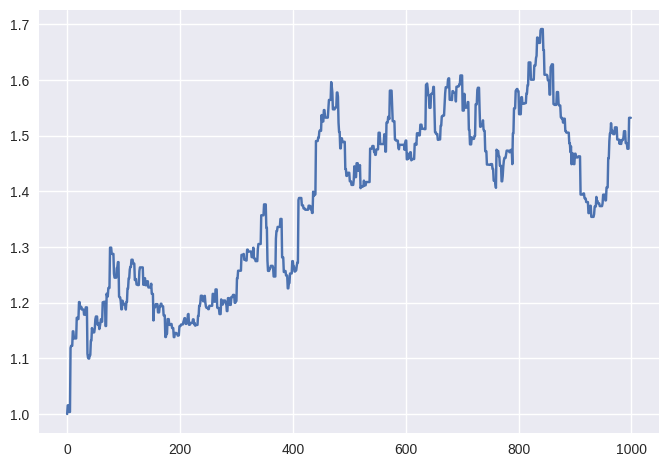

In [238]:
result["cumsum"].plot()

<AxesSubplot: xlabel='Open Time'>

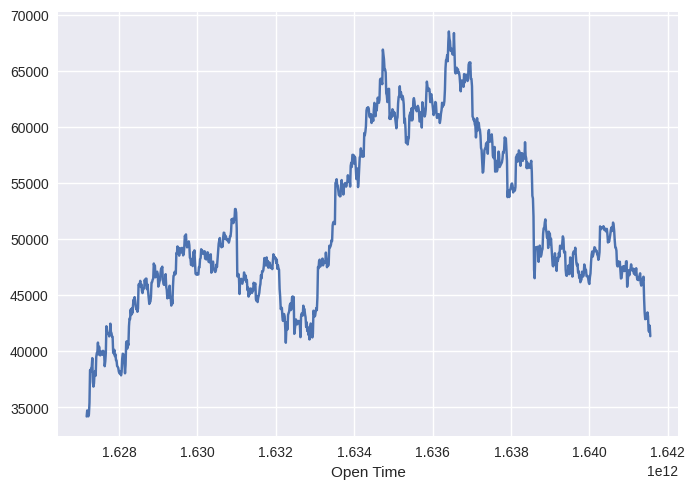

In [227]:
trade["Close"].plot()

<AxesSubplot: >

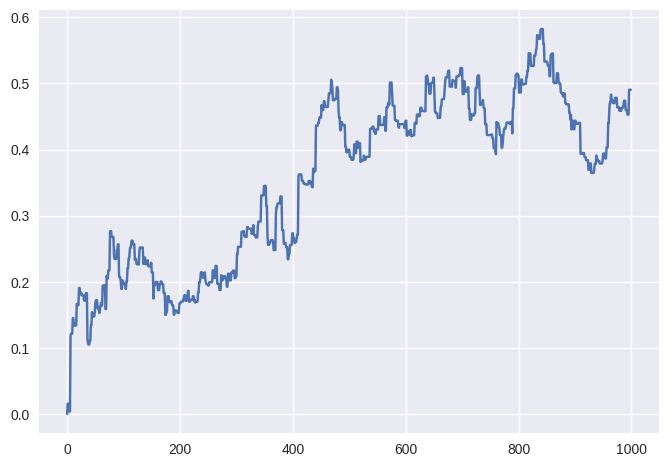

In [226]:
result["cumsum"].plot()

In [217]:
np.exp(np.log((np.array(rewards)+1)).sum())

0.6866546874262432

In [192]:
train_env.count

0

In [176]:
df = pd.DataFrame({"reward":e_train_gym.rewards_memory,"action":e_train_gym.action_memory})
df["mul"] = df["reward"]+1
df["log"] = np.log(df["mul"])
multiple = np.exp(df["log"].sum())
multiple

0.7777536757351166

In [ ]:
df["reward"].describe()

In [177]:
df["action"].value_counts()

0    249
1    161
2     90
Name: action, dtype: int64

In [179]:
multiple

0.7777536757351166

In [ ]:
df.action.value_counts()

In [ ]:
obs = env_train.reset()

In [ ]:
e_train_gym.reset()